# "backtesting crypto"
> "How to fetch and backtest crypto data using fastquant"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Jerome de Leon
- categories: [crypto, backtest, grid search]

<a href="https://colab.research.google.com/github/enzoampil/fastquant/blob/master/examples/2020-05-20-backtest_crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# uncomment to install in colab
# !pip3 install fastquant --update
# or pip install git+https://www.github.com/enzoampil/fastquant.git@history

## fetch data from binance

In [2]:
from fastquant import get_crypto_data

crypto = get_crypto_data("BTC/USDT", 
                         "2018-12-01", 
                         "2019-12-31",
                         time_resolution='1d'
                        )

In [3]:
crypto.tail()

,open,high,low,close,volume
dt,,,,,
2019-12-27,7202.00,7275.86,7076.42,7254.74,33642.701861
2019-12-28,7254.77,7365.01,7238.67,7316.14,26848.982199
2019-12-29,7315.36,7528.45,7288.00,7388.24,31387.106085
2019-12-30,7388.43,7408.24,7220.00,7246.00,29605.911782
2019-12-31,7246.00,7320.00,7145.01,7195.23,25954.453533


## run backtest with a grid of values

In [4]:
from fastquant import backtest

results = backtest('smac', 
                   crypto, 
                   fast_period=[7,14,21,28], 
                   slow_period=[30,45,60,75],
                   plot=False,
                   verbose=False
                  )

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 30
Final Portfolio Value: 167957.05730000004
Final PnL: 67957.06
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 45
Final Portfolio Value: 200109.894525
Final PnL: 100109.89
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 60
Final Portfolio Value: 189298.80590000006
Final PnL: 89298.81
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 75
Final Portfolio Value: 258316.23405000006
Final PnL: 158316.23
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level argume

In [5]:
results.head()

,strat_id,init_cash,buy_prop,sell_prop,commission,execution_type,channel,symbol,fast_period,slow_period,rtot,ravg,rnorm,rnorm100,sharperatio,pnl,final_value
0,3,100000,1,1,0.0075,close,None,None,7,75,0.949014,0.002397,0.829272,82.927229,0.987367,158316.23,258316.234050
1,14,100000,1,1,0.0075,close,None,None,28,60,0.931504,0.002352,0.809002,80.900205,0.986999,153832.42,253832.420400
2,7,100000,1,1,0.0075,close,None,None,14,75,0.830975,0.002098,0.696898,69.689847,0.984563,129555.54,229555.539175
3,11,100000,1,1,0.0075,close,None,None,21,75,0.782243,0.001975,0.645083,64.508323,0.983142,118637.07,218637.072700
4,15,100000,1,1,0.0075,close,None,None,28,75,0.769574,0.001943,0.631874,63.187426,0.982741,115884.74,215884.739100


That's a 258% maximum profit using only SMAC because bitcoin was bullish all time long!

In [6]:
#get best parameters on top row 
fast_best, slow_best = results.iloc[0][["fast_period","slow_period"]]
fast_best, slow_best

(7, 75)

## run backtest using optimum values

In [7]:
import matplotlib as pl
pl.style.use("default")
pl.rcParams["figure.figsize"] = (9,5)

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 75
Final Portfolio Value: 258316.23405000006
Final PnL: 158316.23
Time used (seconds): 0.10248279571533203
Optimal parameters: {'init_cash': 100000, 'buy_prop': 1, 'sell_prop': 1, 'commission': 0.0075, 'execution_type': 'close', 'channel': None, 'symbol': None, 'fast_period': 7, 'slow_period': 75}
Optimal metrics: {'rtot': 0.9490143617322465, 'ravg': 0.002396500913465269, 'rnorm': 0.8292722866407841, 'rnorm100': 82.92722866407841, 'sharperatio': 0.9873670567519415, 'pnl': 158316.23, 'final_value': 258316.23405000006}


<IPython.core.display.Javascript object>


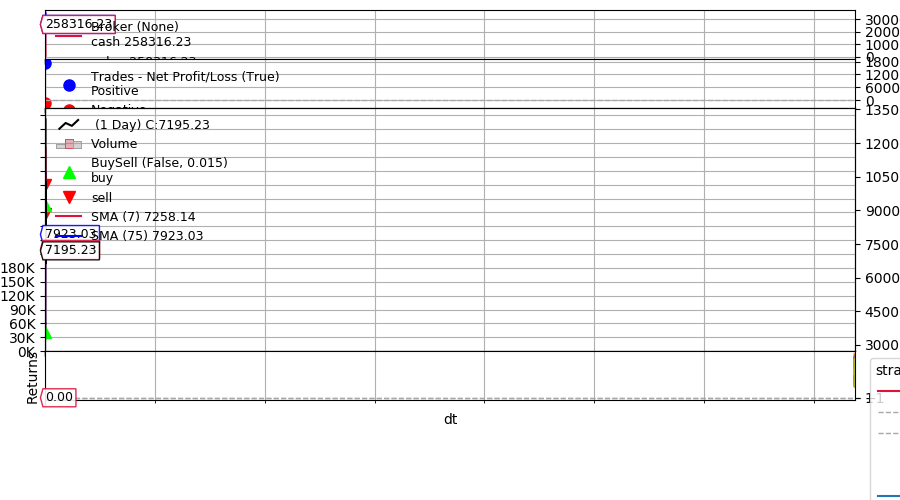

In [8]:
results = backtest('smac', 
                   crypto, 
                   fast_period=fast_best, 
                   slow_period=slow_best,
                   plot=True,
                   verbose=False
                  )

## accessing history of transactions

This is done by setting `return_history`=True.

### single strategy

In [9]:
results, history = backtest('smac', 
                               crypto, 
                               fast_period=fast_best, 
                               slow_period=slow_best,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 75
Final Portfolio Value: 258316.23405000006
Final PnL: 158316.23
Time used (seconds): 0.10444140434265137
Optimal parameters: {'init_cash': 100000, 'buy_prop': 1, 'sell_prop': 1, 'commission': 0.0075, 'execution_type': 'close', 'channel': None, 'symbol': None, 'fast_period': 7, 'slow_period': 75}
Optimal metrics: {'rtot': 0.9490143617322465, 'ravg': 0.002396500913465269, 'rnorm': 0.8292722866407841, 'rnorm100': 82.92722866407841, 'sharperatio': 0.9873670567519415, 'pnl': 158316.23, 'final_value': 258316.23405000006}


In [10]:
results

,strat_id,init_cash,buy_prop,sell_prop,commission,execution_type,channel,symbol,fast_period,slow_period,rtot,ravg,rnorm,rnorm100,sharperatio,pnl,final_value
0,0,100000,1,1,0.0075,close,None,None,7,75,0.949014,0.002397,0.829272,82.927229,0.987367,158316.23,258316.23405


In [11]:
history.keys()

dict_keys(['orders', 'periodic'])

In [12]:
orders = history['orders']
orders

,strat_id,strat_name,dt,type,price,size,value,commission,pnl
0,0,fast_period7_slow_period75,2019-02-15,buy,3590.56,27,96945.12,727.088400,0.00
1,0,fast_period7_slow_period75,2019-08-21,sell,10142.57,-27,96945.12,2053.870425,176904.27
2,0,fast_period7_slow_period75,2019-11-02,buy,9231.61,29,267716.69,2007.875175,0.00
3,0,fast_period7_slow_period75,2019-11-12,sell,8821.94,-29,267716.69,1918.771950,-11880.43


The final value in `results` can be calculated from the `commission` and `pnl` (profit & loss) of all the closed (bought and sold) transactions in history:

In [13]:
r = results.squeeze()
r.final_value

258316.23405000006

In [14]:
r.init_cash + orders.pnl.sum() - orders.commission.sum()

258316.23405000003

### single signal strategy with grid search

In [15]:
results, history = backtest('smac', 
                               crypto, 
                               fast_period=[7,14,21], 
                               slow_period=[30,45,60],
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 30
Final Portfolio Value: 167957.05730000004
Final PnL: 67957.06
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 45
Final Portfolio Value: 200109.894525
Final PnL: 100109.89
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 60
Final Portfolio Value: 189298.80590000006
Final PnL: 89298.81
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 14
slow_period : 30
Final Portfolio Value: 161429.22347500004
Final PnL: 61429.22
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level argume

In [16]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array(['fast_period7_slow_period30', 'fast_period7_slow_period45',
        'fast_period7_slow_period60', 'fast_period14_slow_period30',
        'fast_period14_slow_period45', 'fast_period14_slow_period60',
        'fast_period21_slow_period30', 'fast_period21_slow_period45',
        'fast_period21_slow_period60'], dtype=object))

In [17]:
key = 'strat_id'
periodic = history['periodic']
g = periodic.set_index('dt').groupby(key)
axs = g.portfolio_value.plot(legend=key)
axs[0].set_ylabel('Returns')
axs[0].legend(g.groups, title=key, bbox_to_anchor=(1.01, 1), loc='upper left')

### multi signal strategy

In [18]:
from fastquant import backtest

strats= {
       'smac': {
           'fast_period': 7, 
           'slow_period': 60
            },
        'rsi': {
            'rsi_upper': 70,
            'rsi_lower': 30 
        }
   }
results, history = backtest('multi', 
                               crypto, 
                               strats=strats,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 60
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 30
Final Portfolio Value: 96154.84370000003
Final PnL: -3845.16
Final Portfolio Value: 96154.84370000003
Final PnL: -3845.16
Time used (seconds): 0.12853026390075684
Optimal parameters: {'init_cash': 100000, 'buy_prop': 1, 'sell_prop': 1, 'smac.commission': 0.0075, 'execution_type': 'close', 'smac.channel': None, 'smac.symbol': None, 'smac.fast_period': 7, 'smac.slow_period': 60, 'rsi.commission': 0.0075, 'rsi.channel': None, 'rsi.symbol': None, 'rsi.rsi_period': 14, 'rsi.rsi_upper': 70, 'rsi.rsi_lower': 30}
Optimal metrics: {'rtot': -0.039210338727095576, 'ravg': -9.901600688660499e-05, 'rnorm': -0.024643304876387637, 'rnorm100': -2.464330487638764, 'sharperatio'

In [19]:
results

,strat_id,init_cash,buy_prop,sell_prop,smac.commission,execution_type,smac.channel,smac.symbol,smac.fast_period,smac.slow_period,...,rsi.rsi_period,rsi.rsi_upper,rsi.rsi_lower,rtot,ravg,rnorm,rnorm100,sharperatio,pnl,final_value
0,0,100000,1,1,0.0075,close,None,None,7,60,...,14,70,30,-0.03921,-0.000099,-0.024643,-2.46433,-0.123007,-3845.16,96154.8437


In [20]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([0]),
 array(['smac.fast_period7_slow_period60', 'rsi.rsi_upper70_rsi_lower30'],
       dtype=object))

In [21]:
from fastquant import backtest

strats= {
       'smac': {
           'fast_period': [7,14], 
           'slow_period': [30,60]
            },
        'rsi': {
            'rsi_upper': [70,80],
            'rsi_lower': [20,30] 
        }
   }
results, history = backtest('multi', 
                               crypto, 
                               strats=strats,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 30
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 20
Final Portfolio Value: 101479.475225
Final PnL: 1479.48
Final Portfolio Value: 101479.475225
Final PnL: 1479.48
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 30
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 30
Final Portfolio Value: 92990.43297500002
Final PnL: -7009.57
Final Portfolio Value: 92990.43297500002
Final PnL: -7009.57
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strate

In [22]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array(['smac.fast_period7_slow_period30', 'rsi.rsi_upper70_rsi_lower20',
        'rsi.rsi_upper70_rsi_lower30', 'rsi.rsi_upper80_rsi_lower20',
        'rsi.rsi_upper80_rsi_lower30', 'smac.fast_period7_slow_period60',
        'smac.fast_period14_slow_period30',
        'smac.fast_period14_slow_period60'], dtype=object))

### custom strategy

In [23]:
import numpy as np

#add a column which is a proxy buy/sell indicator for custom strategy
crypto["custom"] = crypto.close.pct_change()

In [24]:
results, history = backtest('custom', 
                                crypto, 
                                upper_limit=0.05, 
                                lower_limit=-0.05,
                                plot=False,
                                verbose=False,
                                return_history=True
                                )

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
Upper limit:  0.05
Lower limit:  -0.05
Final Portfolio Value: 165576.88775000008
Final PnL: 65576.89
Time used (seconds): 0.12016487121582031
Optimal parameters: {'init_cash': 100000, 'buy_prop': 1, 'sell_prop': 1, 'commission': 0.0075, 'execution_type': 'close', 'channel': None, 'symbol': None, 'upper_limit': 0.05, 'lower_limit': -0.05, 'custom_column': 'custom'}
Optimal metrics: {'rtot': 0.5042654794956734, 'ravg': 0.0012733976754941247, 'rnorm': 0.3783625190470573, 'rnorm100': 37.83625190470573, 'sharperatio': 0.7416913074113402, 'pnl': 65576.89, 'final_value': 165576.88775000008}


In [25]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([0]), array(['upper_limit0.05_lower_limit-0.05'], dtype=object))